In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Step 1: Exploring Basic Convolution and Custom Kernels
Apply Convolution with a Simple Kernel


When applied to a grayscale image using 2D convolution, this kernel preserves the original image, effectively resulting in no visible change. This is because the convolution process multiplies each pixel's intensity by 1 and adds nothing from neighboring pixels.

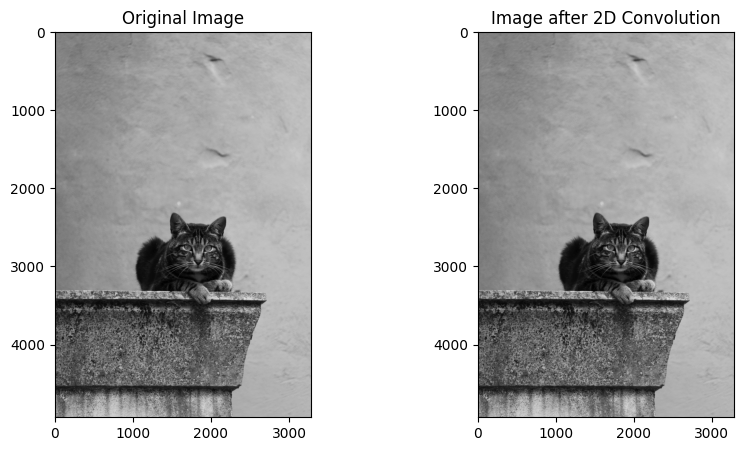

In [12]:
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

image = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)
# Apply convolution using cv2.filter2D
filtered_image = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Image after 2D Convolution")
plt.imshow(filtered_image, cmap='gray')
plt.show()

Custom Kernel Design

This kernel increases the contrast at edges and enhances the details in the image. The central pixel is amplified (weighted by 5.5), while the surrounding pixels are subtracted, making edges and fine details more prominent.

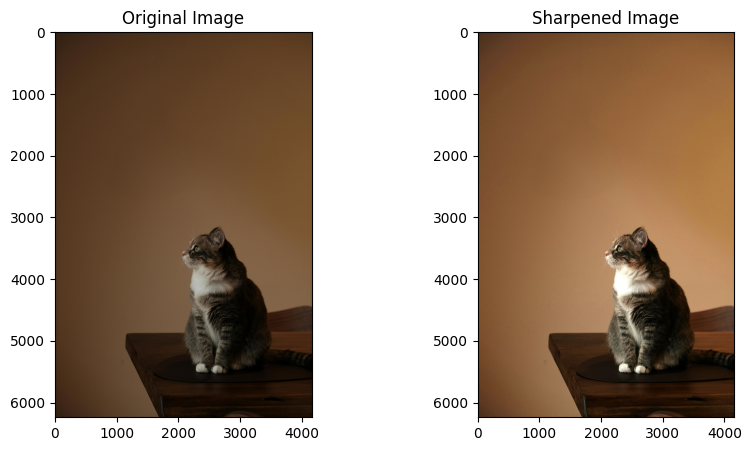

In [13]:
sharpening_kernel = np.array([[0, -1, 0],
                   [-1, 5.5, -1],
                   [0, -1, 0]])
image_path = cv2.imread('Image2.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
#convolved_image= cv2.filter2D(sharpened_image, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.show()

Step 2: Understanding Padding and Its Effects on Convolution

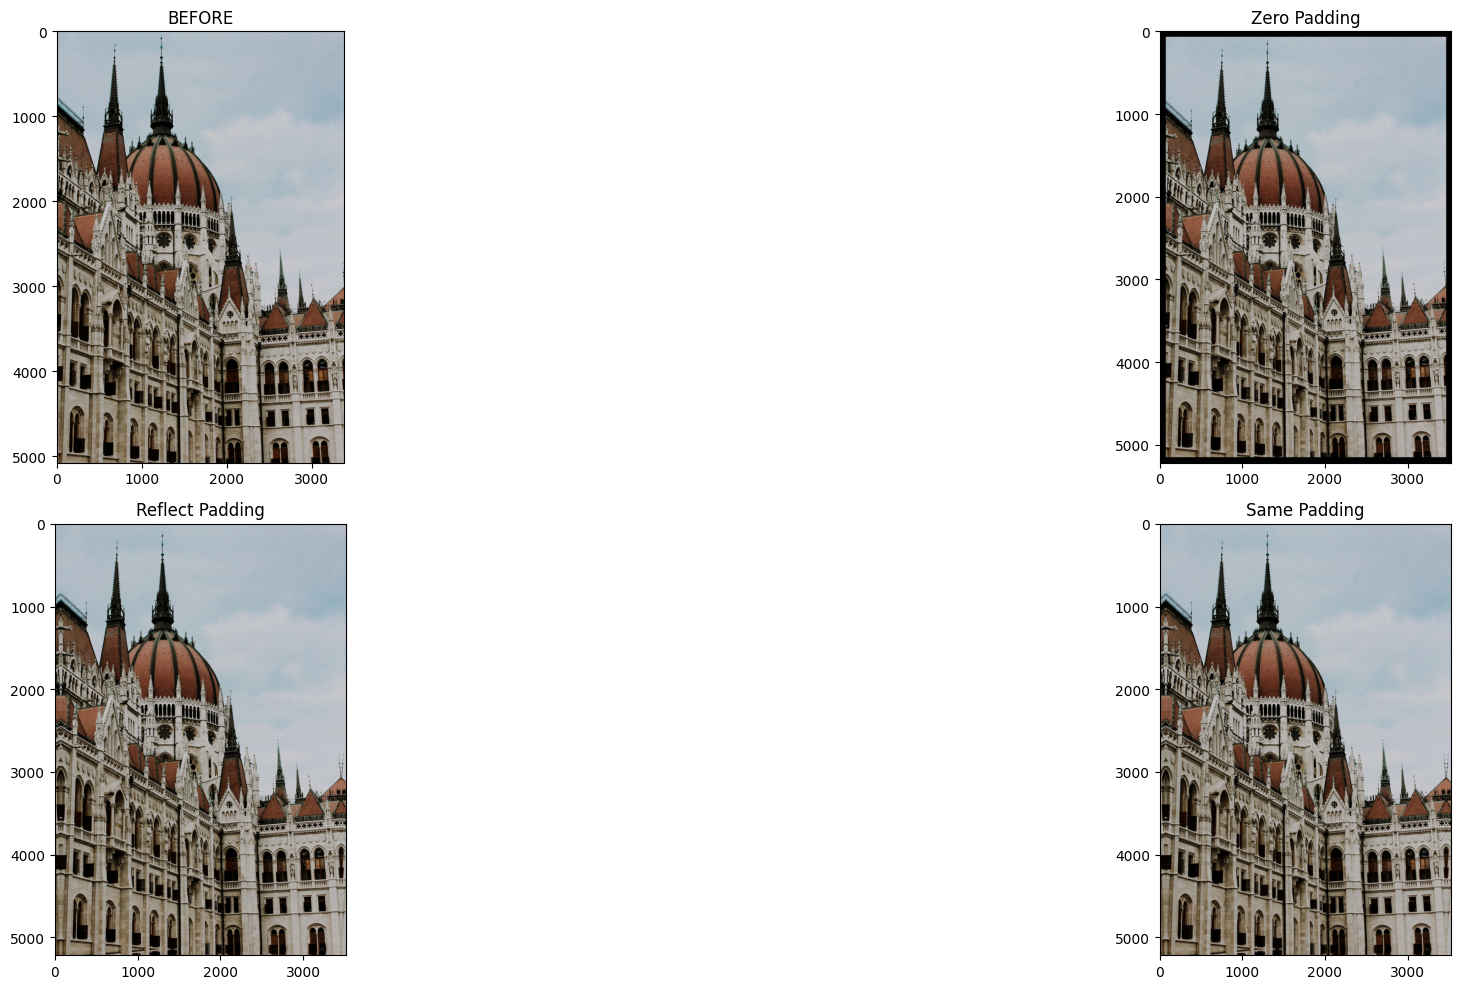

In [14]:
sharpening_kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
image_path = cv2.imread('Image3.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Apply Padding
zero_padding = cv2.copyMakeBorder(sharpened_image, 70, 70, 70, 70, cv2.BORDER_CONSTANT, value=0)
reflect_padding=cv2.copyMakeBorder(sharpened_image, 70, 70, 70, 70, cv2.BORDER_REFLECT)
same_padding=cv2.copyMakeBorder(sharpened_image, 70, 70, 70, 70, cv2.BORDER_DEFAULT)

plt.figure(figsize=(30, 10))

plt.subplot(2, 2, 1)
plt.title('BEFORE')
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.title("Zero Padding")
plt.imshow(zero_padding)

plt.subplot(2, 2, 3)
plt.title("Reflect Padding")
plt.imshow(reflect_padding)

plt.subplot(2, 2, 4)
plt.title("Same Padding")
plt.imshow(same_padding)

plt.tight_layout()
plt.show()

step-3
Adding Noise and Applying an average Filter

Adding Gaussian noise introduces random pixel intensity variations, creating a speckled appearance. Applying a 5x5 average filter reduces the noise level by smoothing the pixel values in local regions, resulting in a less noisy but slightly blurred image.

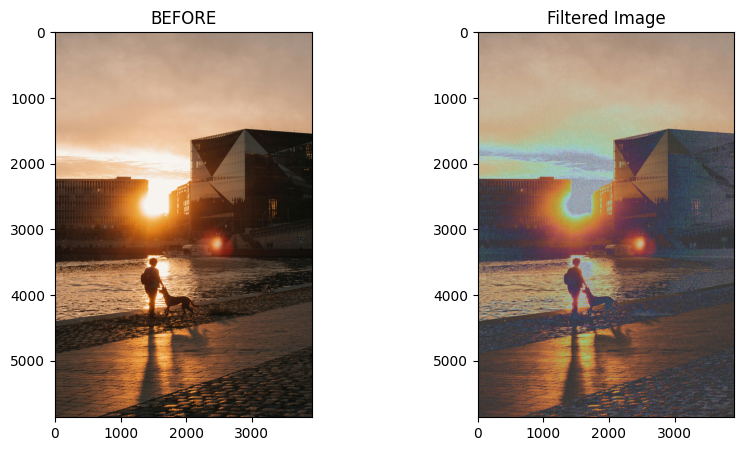

In [36]:
img = cv2.imread('Image4.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def add_gaussian_noise(image, mean=0, sigma=25):
    noisy_image = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return noisy_image
output = add_gaussian_noise(img)
filtered_image = cv2.blur(output, (5, 5))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('BEFORE')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Filtered Image")
plt.imshow(filtered_image)
plt.show()

5. Gaussian Blur for Smoothing

Low sigma value (e.g., sigma=1): Minimal smoothing, where noise is slightly reduced but details remain more intact.
Higher sigma values (e.g., sigma=2, sigma=3): Increased smoothing, reducing noise more effectively at the cost of blurring fine details and edges. This highlights the trade-off between noise reduction and image sharpness.

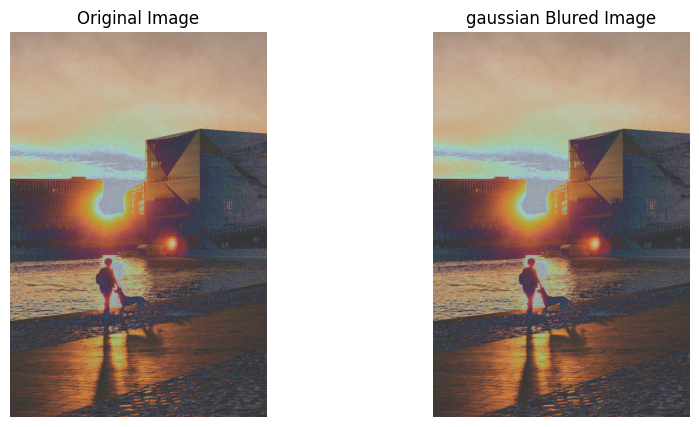

In [38]:
def add_gaussian_noise(image, mean=0, sigma=3):
    noisy_image = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return noisy_image
gss_filtered_image = cv2.GaussianBlur(filtered_image, (5, 5), sigmaX=30)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gss_filtered_image)
plt.title('gaussian Blured Image')
plt.axis('off')

plt.show()

Step 4: Edge Detection and Gradient Calculation
  6. Applying Laplacian Filter for Edge Detection

The Laplacian filter highlights edges by detecting regions where intensity changes rapidly. The resulting image will show sharp transitions as bright edges on a darker background, emphasizing fine details and edges irrespective of their orientation.

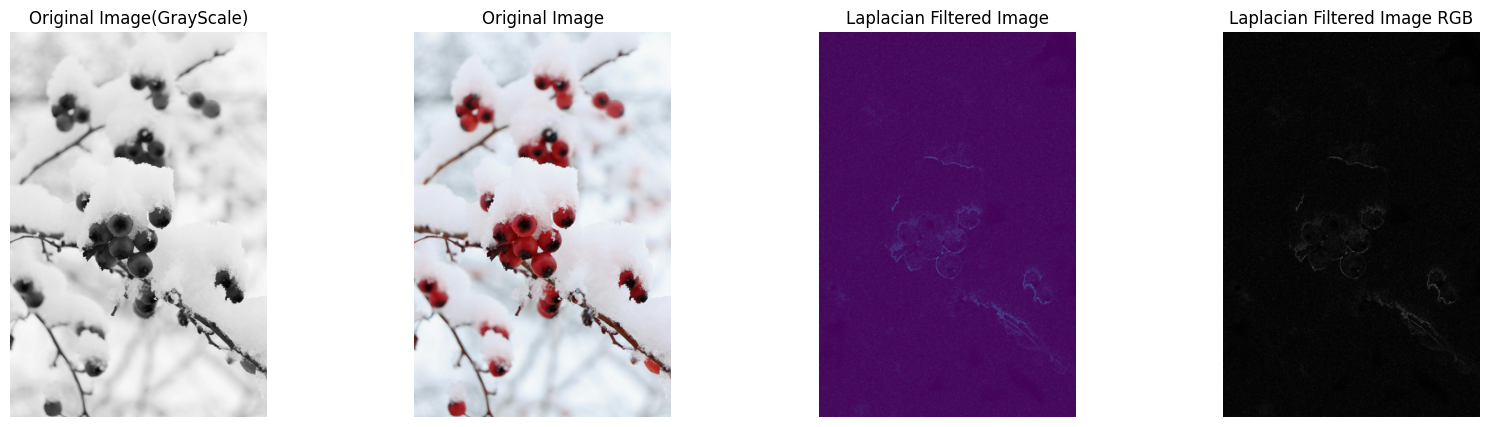

In [31]:
image_path = './Image5.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(clear_image, cv2.COLOR_BGR2RGB)
clear_image = cv2.cvtColor(clear_image, cv2.COLOR_BGR2GRAY)
# Apply Laplacian filter
laplacian_filtered_image = cv2.Laplacian(clear_image, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)

laplacian_filtered_image_rgb = cv2.Laplacian(rgb_image, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image_rgb = cv2.convertScaleAbs(laplacian_filtered_image_rgb)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(clear_image,cmap='gray')
plt.title('Original Image(GrayScale)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(laplacian_filtered_image)
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(laplacian_filtered_image_rgb)
plt.title('Laplacian Filtered Image RGB')
plt.axis('off')

plt.show()

7. Estimating Horizontal and Vertical Gradients

The vertical edges result emphasizes edges where intensity changes occur in the vertical direction (e.g., left-right transitions).
The horizontal edges result highlights edges where intensity changes occur in the horizontal direction (e.g., top-bottom transitions).
Each kernel captures directional information effectively, allowing for detailed edge analysis

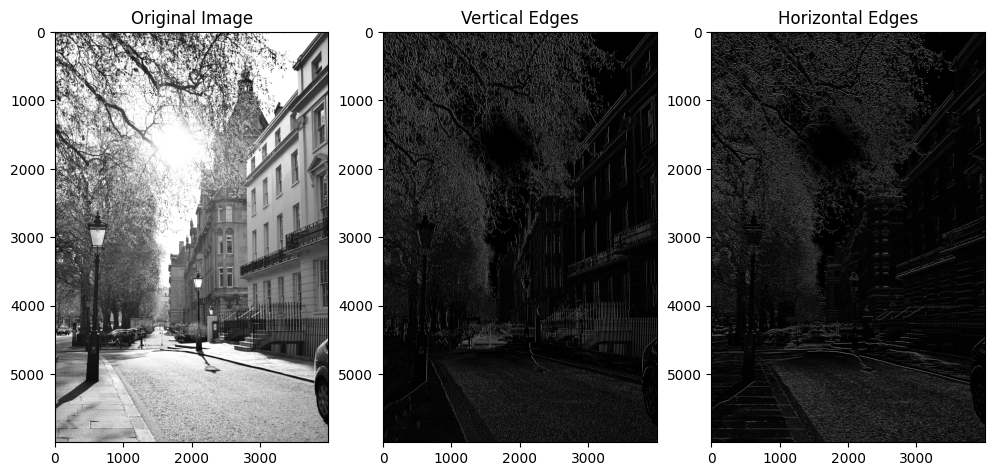

In [18]:
image = cv2.imread('Image6.jpg', cv2.IMREAD_GRAYSCALE)

vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]], dtype=np.float32)

horizontal_kernel = np.array([[-1, -1, -1],
                              [0, 0, 0],
                              [1, 1, 1]], dtype=np.float32)

vertical_edges = cv2.filter2D(image, -1, vertical_kernel)
horizontal_edges = cv2.filter2D(image, -1, horizontal_kernel)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')

plt.subplot(133)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')

plt.show()

Step 5: Image Enhancement through Histogram Equalization
8. Histogram Equalization for Contrast Enhancement

After applying histogram equalization, the image's overall contrast improves significantly. Darker regions become more distinguishable, and finer details in brighter areas are better highlighted, resulting in a more balanced visual representation.

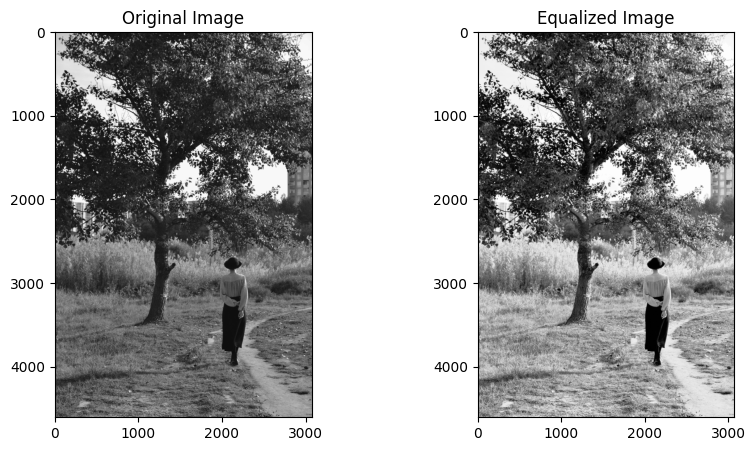

In [19]:
#Task 1:
img = cv2.imread('Image7.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap='gray')
plt.show()

The first equalization yields the most noticeable improvement in contrast. Subsequent equalizations show little to no additional enhancement, as the image histogram stabilizes. Slight artifacts, such as overly pronounced intensity shifts, may become visible after repeated processing.

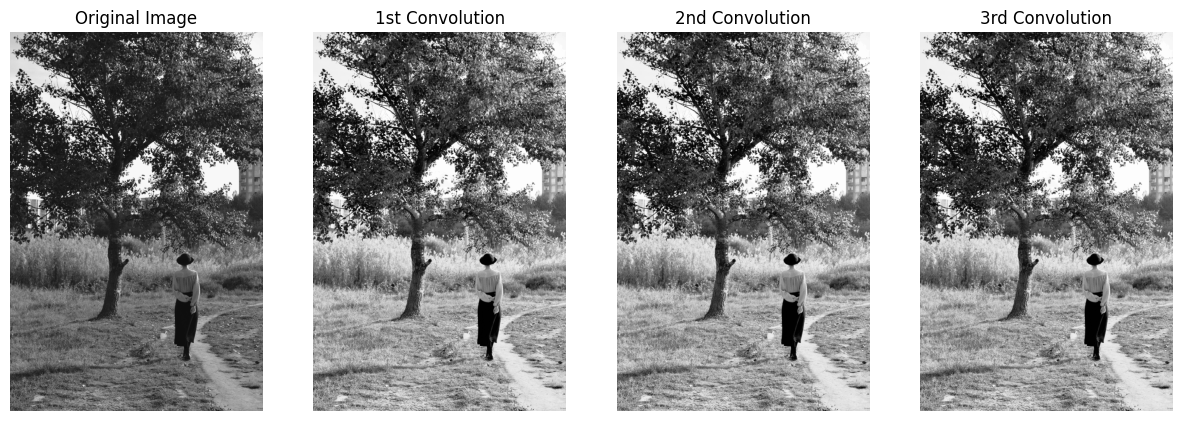

In [20]:
#Task 2:

img = cv2.imread('Image7.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization three times
equalized_img1 = cv2.equalizeHist(img)
equalized_img2 = cv2.equalizeHist(equalized_img1)
equalized_img3 = cv2.equalizeHist(equalized_img2)

# Display the original and the image after three equalizations
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title(f'Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(equalized_img1, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(equalized_img2, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(equalized_img3, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()